# Data Mining Project

## Los Angeles Crimes Classification - Violent or Non-Violent Crime

### Name: Manikandan Mohan
### NUID: 02242414

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


## Data Loading 

In [2]:
# Load the dataset
dataset_path = 'C:/Users/manik/Downloads/Crime_Data_from_2024_to_Present.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,Crime Type,Rptd Day,Rptd Month,Rptd Year,OCC Day,OCC Month,OCC Year
0,240104738,1/9/2024,1/9/2024,930,1,Central,162,1,310,BURGLARY,...,NaN,34.0452,-118.2569,Non-violent,9,1,2024,9,1,2024
1,241304386,1/8/2024,1/8/2024,2000,13,Newton,1372,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,33.9934,-118.2714,Non-violent,8,1,2024,8,1,2024
2,241406688,2/27/2024,2/17/2024,1200,14,Pacific,1435,2,354,THEFT OF IDENTITY,...,NaN,34.0082,-118.4306,Non-violent,27,2,2024,17,2,2024
3,240308150,3/21/2024,3/9/2024,1900,3,Southwest,338,1,330,BURGLARY FROM VEHICLE,...,NaN,34.0275,-118.2891,Non-violent,21,3,2024,9,3,2024
4,240104852,1/13/2024,1/13/2024,243,1,Central,119,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,34.0566,-118.2318,Non-violent,13,1,2024,13,1,2024


In [3]:
data = df.copy()

In [4]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Crime Type', 'Rptd Day', 'Rptd Month', 'Rptd Year', 'OCC Day',
       'OCC Month', 'OCC Year'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29106 entries, 0 to 29105
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           29106 non-null  int64  
 1   Date Rptd       29106 non-null  object 
 2   DATE OCC        29106 non-null  object 
 3   TIME OCC        29106 non-null  int64  
 4   AREA            29106 non-null  int64  
 5   AREA NAME       29106 non-null  object 
 6   Rpt Dist No     29106 non-null  int64  
 7   Part 1-2        29106 non-null  int64  
 8   Crm Cd          29106 non-null  int64  
 9   Crm Cd Desc     29106 non-null  object 
 10  Mocodes         25905 non-null  object 
 11  Vict Age        29106 non-null  int64  
 12  Vict Sex        25983 non-null  object 
 13  Vict Descent    25981 non-null  object 
 14  Premis Cd       29105 non-null  float64
 15  Premis Desc     29089 non-null  object 
 16  Weapon Used Cd  14558 non-null  float64
 17  Weapon Desc     14558 non-null 

In [6]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,...,Crm Cd 3,Crm Cd 4,LAT,LON,Rptd Day,Rptd Month,Rptd Year,OCC Day,OCC Month,OCC Year
count,2.910600e+04,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29105.000000,14558.000000,29106.000000,...,63.000000,2.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.0,29106.000000,29106.000000,29106.000000
mean,2.410744e+08,1352.184945,10.791211,1125.407579,1.444788,495.922868,29.489177,318.145645,362.267070,495.677146,...,990.047619,998.500000,34.073214,-118.354367,15.577166,1.952381,2024.0,15.458497,2.459493,2023.911805
std,1.562691e+06,649.636146,6.160004,615.870632,0.496951,213.967759,21.491265,221.659918,118.325624,213.760033,...,26.182011,0.707107,0.112094,0.102710,8.869299,0.829867,0.0,8.949115,2.274881,0.360315
min,2.401000e+03,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,...,860.000000,998.000000,33.705900,-118.667300,1.000000,1.000000,2024.0,1.000000,1.000000,2020.000000
25%,2.406005e+08,920.000000,6.000000,621.000000,1.000000,330.000000,13.000000,102.000000,400.000000,330.000000,...,998.000000,998.250000,34.013125,-118.426900,8.000000,1.000000,2024.0,8.000000,1.000000,2024.000000
50%,2.411058e+08,1430.000000,11.000000,1151.000000,1.000000,510.000000,30.000000,210.000000,400.000000,510.000000,...,998.000000,998.500000,34.058200,-118.321500,16.000000,2.000000,2024.0,16.000000,2.000000,2024.000000
75%,2.416055e+08,1900.000000,16.000000,1655.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,...,998.000000,998.750000,34.166700,-118.276900,23.000000,3.000000,2024.0,23.000000,3.000000,2024.000000
max,2.421075e+08,2359.000000,21.000000,2197.000000,2.000000,956.000000,99.000000,974.000000,516.000000,956.000000,...,999.000000,999.000000,34.328100,-118.156000,31.000000,4.000000,2024.0,31.000000,12.000000,2024.000000


In [7]:
data.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            3201
Vict Age              0
Vict Sex           3123
Vict Descent       3125
Premis Cd             1
Premis Desc          17
Weapon Used Cd    14548
Weapon Desc       14548
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          26934
Crm Cd 3          29043
Crm Cd 4          29104
LOCATION              0
Cross Street      24603
LAT                   0
LON                   0
Crime Type            0
Rptd Day              0
Rptd Month            0
Rptd Year             0
OCC Day               0
OCC Month             0
OCC Year              0
dtype: int64

## Analysis of Features through Visualizations




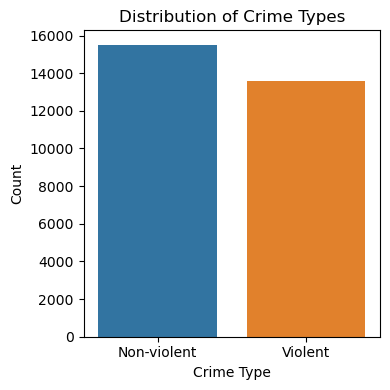

In [8]:
# Plotting the distribution of the target variable 'Crime Type'
plt.figure(figsize=(4, 4))
crime_type_count = sns.countplot(data=data, x='Crime Type')
crime_type_count.set_title('Distribution of Crime Types')
crime_type_count.set_xlabel('Crime Type')
crime_type_count.set_ylabel('Count')

plt.tight_layout()
plt.show()


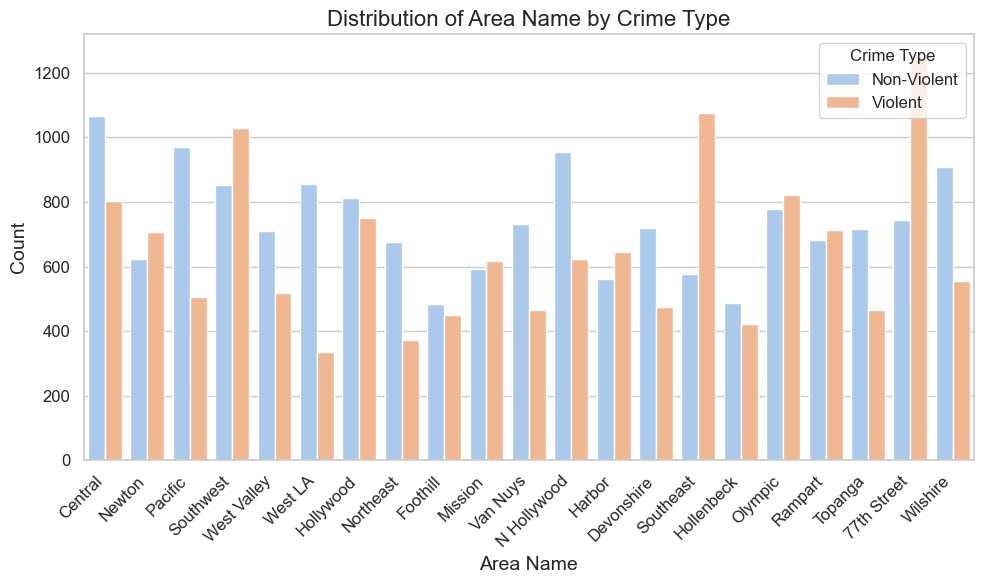

In [9]:

# Set the style
sns.set(style="whitegrid")

# Define categorical features


# Set the color palette
palette = sns.color_palette("pastel")

# Iterate over each categorical feature

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AREA NAME', hue='Crime Type', palette=palette)
plt.title('Distribution of Area Name by Crime Type', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Crime Type', labels=['Non-Violent', 'Violent'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


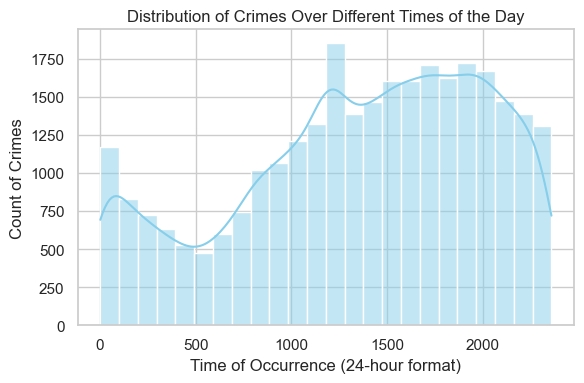

In [10]:
# Histogram of the time of occurrence
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='TIME OCC', bins=24, kde=True, color='skyblue')
plt.title('Distribution of Crimes Over Different Times of the Day')
plt.xlabel('Time of Occurrence (24-hour format)')
plt.ylabel('Count of Crimes')

plt.tight_layout()
plt.show()

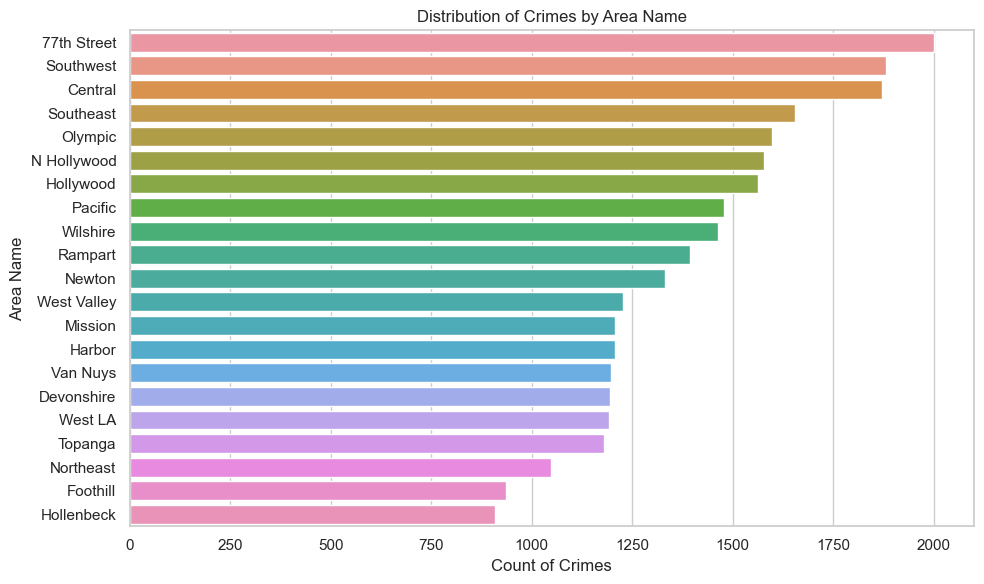

In [11]:
sns.set_style("whitegrid")

# Plotting the distribution of crimes by AREA NAME
plt.figure(figsize=(10, 6))
area_crime_count = sns.countplot(data=data, y='AREA NAME', order = data['AREA NAME'].value_counts().index)
area_crime_count.set_title('Distribution of Crimes by Area Name')
area_crime_count.set_xlabel('Count of Crimes')
area_crime_count.set_ylabel('Area Name')

plt.tight_layout()
plt.show()

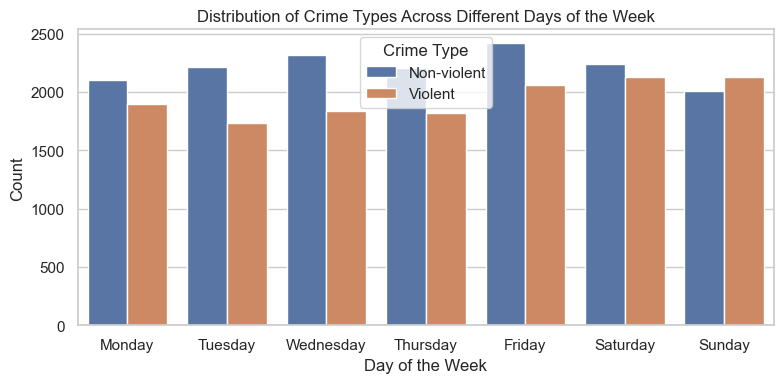

In [12]:
# Converting 'DATE OCC' to datetime format
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extracting the day of the week (Monday=0, Sunday=6)
data['Day of Week'] = data['DATE OCC'].dt.dayofweek

# Mapping the day of the week to actual names for readability
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['Day of Week Name'] = data['Day of Week'].map(day_of_week_map)

# Plotting the distribution of crime types across different days of the week
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Day of Week Name', hue='Crime Type', order=day_of_week_map.values())
plt.title('Distribution of Crime Types Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Crime Type')

plt.tight_layout()
plt.show()


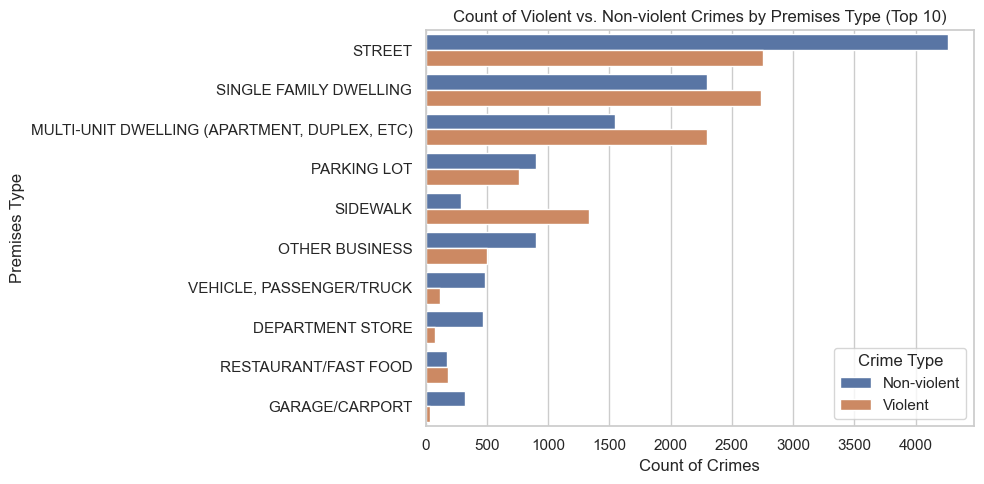

In [13]:
# Identifying the top 10 most common premises for crimes
top_premises = data['Premis Desc'].value_counts().nlargest(10).index

# Filtering the data to include only crimes that occurred in these top premises
filtered_data_by_premise = data[data['Premis Desc'].isin(top_premises)]

# Plotting the count of violent and non-violent crimes for these top premises
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data_by_premise, y='Premis Desc', hue='Crime Type', order=top_premises)
plt.title('Count of Violent vs. Non-violent Crimes by Premises Type (Top 10)')
plt.xlabel('Count of Crimes')
plt.ylabel('Premises Type')
plt.legend(title='Crime Type')

plt.tight_layout()
plt.show()


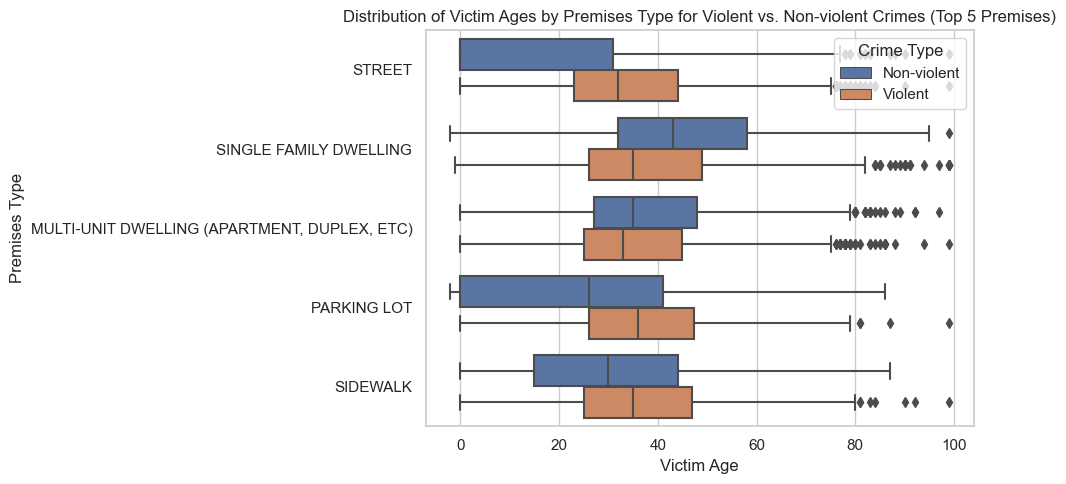

In [14]:
# Because of the potentially large number of unique premises, we'll focus again on the top 5 most common premises
top_5_premises = data['Premis Desc'].value_counts().nlargest(5).index

# Filtering the data to include only crimes that occurred in these top 5 premises
filtered_data_top_5_premise = data[data['Premis Desc'].isin(top_5_premises)]

# Creating box plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_data_top_5_premise, y='Premis Desc', x='Vict Age', hue='Crime Type',
            order=top_5_premises)
plt.title('Distribution of Victim Ages by Premises Type for Violent vs. Non-violent Crimes (Top 5 Premises)')
plt.xlabel('Victim Age')
plt.ylabel('Premises Type')
plt.legend(title='Crime Type', loc='upper right')

plt.tight_layout()
plt.show()


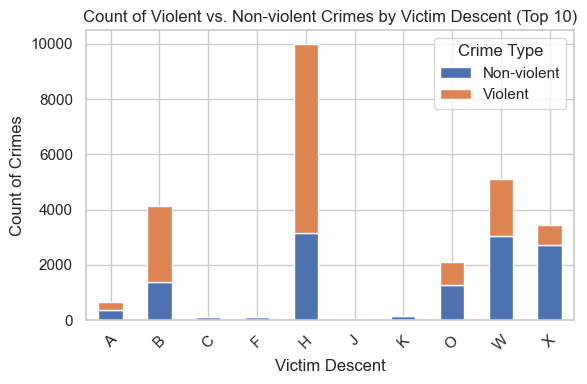

In [15]:
# Identifying the top 10 most common descents among victims
top_descents = data['Vict Descent'].value_counts().nlargest(10).index

# Filtering the data to include only the top descents
filtered_data_by_descent = data[data['Vict Descent'].isin(top_descents)]

# Preparing data for the stacked bar chart
victim_descent_crime_type = filtered_data_by_descent.groupby(['Vict Descent', 'Crime Type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
victim_descent_crime_type.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Count of Violent vs. Non-violent Crimes by Victim Descent (Top 10)')
plt.xlabel('Victim Descent')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


A - Asian B - Black C - Chinese F - Filipino H - Hispanic/Latin/Mexican  J - Japanese K - Korean O - Other W - White X - Unknown 

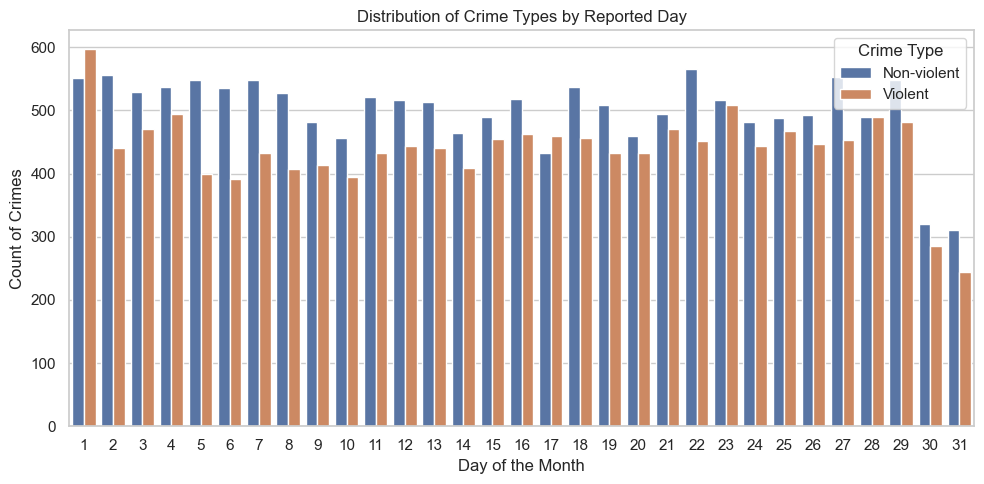

In [16]:
# Plotting the distribution of crimes by reported day
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Rptd Day', hue='Crime Type')
plt.title('Distribution of Crime Types by Reported Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count of Crimes')
plt.legend(title='Crime Type')

plt.tight_layout()
plt.show()


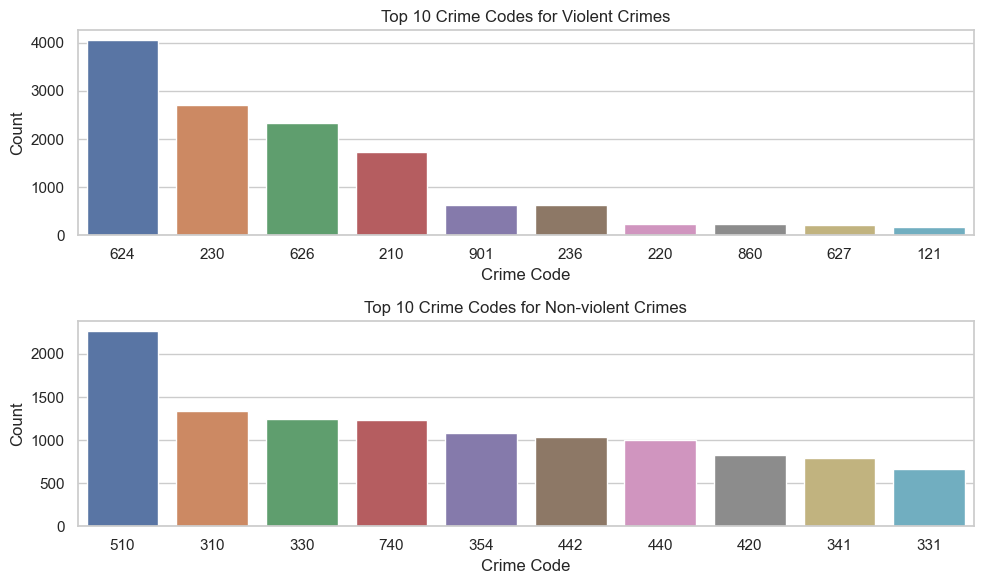

In [17]:
# Identifying the top 10 crime codes for violent crimes

violent_data = data[data['Crime Type']== 'Violent']
non_violent_data = data[data['Crime Type']== 'Non-violent']

top_violent_crime_codes = violent_data['Crm Cd'].value_counts().nlargest(10).index

# Identifying the top 10 crime codes for non-violent crimes
top_non_violent_crime_codes = non_violent_data['Crm Cd'].value_counts().nlargest(10).index

# Filtering the data to include only these top crime codes
filtered_violent_data_by_code = violent_data[violent_data['Crm Cd'].isin(top_violent_crime_codes)]
filtered_non_violent_data_by_code = non_violent_data[non_violent_data['Crm Cd'].isin(top_non_violent_crime_codes)]

# Plotting the top crime codes for violent crimes
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.countplot(data=filtered_violent_data_by_code, x='Crm Cd', order=top_violent_crime_codes)
plt.title('Top 10 Crime Codes for Violent Crimes')
plt.xlabel('Crime Code')
plt.ylabel('Count')

# Plotting the top crime codes for non-violent crimes
plt.subplot(2, 1, 2)
sns.countplot(data=filtered_non_violent_data_by_code, x='Crm Cd', order=top_non_violent_crime_codes)
plt.title('Top 10 Crime Codes for Non-violent Crimes')
plt.xlabel('Crime Code')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


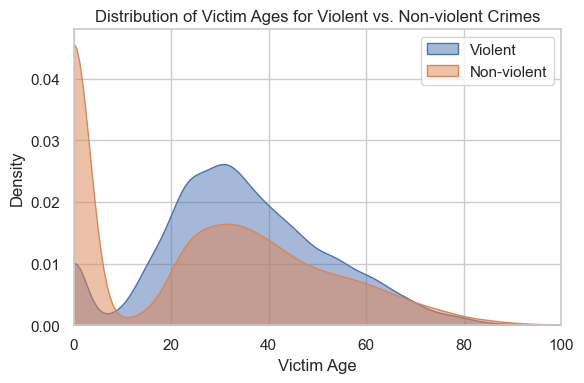

In [18]:
# KDE plots for the distribution of victim ages in violent and non-violent crimes
plt.figure(figsize=(6, 4))
sns.kdeplot(data=violent_data, x='Vict Age', label='Violent', fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data=non_violent_data, x='Vict Age', label='Non-violent', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of Victim Ages for Violent vs. Non-violent Crimes')
plt.xlabel('Victim Age')
plt.ylabel('Density')
plt.xlim(0, 100)  # Limiting age range for better readability
plt.legend()

plt.tight_layout()
plt.show()


## Data Cleaning and Pre-processing

In [19]:
#Handling the Missing Values

#Dropping columns that have than half of NULL values
data = data.drop(columns= ['Crm Cd 2','Crm Cd 3', 'Crm Cd 4', 'Cross Street'])

#Dropping the column DR_NN since it is not needed for classification of Crime Type
data = data.drop(columns= ['DR_NO'])

#For Weapon Desc and Weapon Cd column, filling the blank cells with the appropriate description and code for 'Unknown Weapon'
data['Weapon Desc'].fillna('UNKNOWN WEAPON/OTHER WEAPON',inplace=True)
data['Weapon Used Cd'].fillna(500,inplace=True)

#For Vict Sex column, blank cells are filled with the 'X' as that represents 'Unknown Sex'
data['Vict Sex'].fillna('X',inplace=True)

#For Vict Descent column, blank cells are filled with the 'X' as that represents 'Unknown Descent'
data['Vict Descent'].fillna('X',inplace=True)

#For Mocodes column, blank cells are filled with the '9999' as that represents 'IndSistinctive MO'
data['Mocodes'].fillna('9999',inplace=True)

#For the remaining NULL values of other columns, just dropping the rows.
data.dropna(inplace=True)


In [20]:
#Imputing zero and negative age values with median age values
median_age = data['Vict Age'].median()

data['Vict Age'] = data['Vict Age'].apply(lambda x: median_age if x <= 0 else x)


In [21]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Create 'Day', and 'Month' columns for 'Date Rptd'
data['Rptd Day'] = data['Date Rptd'].dt.day
data['Rptd Month'] = data['Date Rptd'].dt.month

# Create 'Day', and 'Month' columns for 'DATE OCC'
data['OCC Day'] = data['DATE OCC'].dt.day
data['OCC Month'] = data['DATE OCC'].dt.month

In [22]:
data.shape

(29089, 32)

In [23]:
#Feature selection - Removing Unwanted Columns

#Since we are having lat and long, dropping the 'Location' (text) column
data = data.drop(columns= ['LOCATION'])

#Dropping the Dates of Crime reported and occured as seperate columns for month and day are created
data = data.drop(columns= ['Date Rptd', 'DATE OCC'])

#Droping the Descriptions columns 'Crm Cd Desx' , 'Premis Desc', 'Weapon Desc', 'Status Desc' as their 'Cd' columns represent the same. 
#Also they are text columns and better to drop to reduce features.
data = data.drop(columns= ['Crm Cd Desc', 'Premis Desc', 'Status Desc', 'Weapon Desc'])



In [24]:
#Dropping mocodes
data = data.drop(columns= ['Mocodes'])

## Feature Selection and Encoding/Standardizing the Data

In [25]:
# Splitting the dataset into X and Y values
X = data.drop('Crime Type', axis=1)
y = data['Crime Type'].apply(lambda x: 1 if x == 'Violent' else 0) # Convert target variable to binary



# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()


# Calculate Pearson's correlation for numerical features
correlations = data[numerical_cols].corrwith(y).abs()

# Select numerical features with correlation above a threshold (e.g., 0.1)
selected_numerical_features = correlations[correlations > 0.1].index.tolist()

# Chi-squared test for categorical features
selected_categorical_features = []
for col in categorical_cols:
    contigency_table = pd.crosstab(data[col], y)
    chi2, p, dof, expected = chi2_contingency(contigency_table)
    if p < 0.05:  # If the feature is statistically significant
        selected_categorical_features.append(col)

# Combine selected numerical and categorical features
selected_features = selected_numerical_features + selected_categorical_features

# Summary of selected features
selected_features
X_sel = X[selected_features]




C:\Users\manik\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\manik\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [26]:
#Standardizing the columns, performing One-hot Encoding and Imputing values 

# Identify categorical and numerical columns
categorical_cols_sel = X_sel.select_dtypes(include=['object']).columns.tolist()
numerical_cols_sel = X_sel.select_dtypes(exclude=['object']).columns.tolist()



# Preprocessing for numerical data: impute missing values with the median then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values with the most frequent value then apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_sel),
        ('cat', categorical_transformer, categorical_cols_sel)
    ]
)

In [27]:
X_preprocessed = preprocessor.fit_transform(X_sel)

#Splitting the data into Train and Test values
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((23271, 59), (5818, 59))

## Defining Models and Evaluation

In [28]:

# Initialize the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


# Dictionary to store models
models = {'Logistic Regression': log_reg, 'K-Nearest Neighbour': knn, 'Decision Tree': dtree, 'Random Forest': rf}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    predictions = model.predict(X_test)
    # Evaluate
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

results


{'Logistic Regression': {'Accuracy': 0.8791680990030939,
  'Precision': 0.9108870967741935,
  'Recall': 0.8241517694272164,
  'F1 Score': 0.8653514652365447},
 'K-Nearest Neighbour': {'Accuracy': 0.8399793743554486,
  'Precision': 0.8494208494208494,
  'Recall': 0.8026267785479752,
  'F1 Score': 0.8253610954792722},
 'Decision Tree': {'Accuracy': 0.8805431419731866,
  'Precision': 0.8916539050535988,
  'Recall': 0.8496898941991974,
  'F1 Score': 0.8701662619092099},
 'Random Forest': {'Accuracy': 0.892918528704022,
  'Precision': 0.8948545861297539,
  'Recall': 0.8755928493250639,
  'F1 Score': 0.8851189378572745}}

In [29]:
# Define the Neural Network model
X_train_np = X_train.toarray()
y_train_np = y_train.values
X_test_np = X_test.toarray()
y_test_np = y_test.values

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_np, y_train_np, epochs=100, batch_size=128, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test_np, y_test_np)


# Make predictions on the test set
predictions = model.predict(X_test_np)
# Convert probabilities to binary predictions (0 or 1) using 0.5 as a threshold
predictions_binary = (predictions > 0.5).astype("int32")

# Calculate metrics
nn_accuracy = accuracy_score(y_test, predictions_binary)
nn_precision = precision_score(y_test, predictions_binary)
nn_recall = recall_score(y_test, predictions_binary)
nn_f1 = f1_score(y_test, predictions_binary)

# Print the evaluation metrics
print(f"Neural Network Model Evaluation:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1 Score: {nn_f1:.4f}")







Epoch 1/100


146/146 [==============================] - 2s 6ms/step - loss: 0.3905 - accuracy: 0.8520 - val_loss: 0.2805 - val_accuracy: 0.9055
Epoch 2/100
146/146 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.9024 - val_loss: 0.2605 - val_accuracy: 0.9104
Epoch 3/100
146/146 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.9058 - val_loss: 0.2494 - val_accuracy: 0.9124
Epoch 4/100
146/146 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9059 - val_loss: 0.2514 - val_accuracy: 0.9134
Epoch 5/100
146/146 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9074 - val_loss: 0.2512 - val_accuracy: 0.9160
Epoch 6/100
146/146 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.9073 - val_loss: 0.2503 - val_accuracy: 0.9139
Epoch 7/100
146/146 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9078 - val_loss: 0.2462 - val_accuracy: 0.

## Hyperparamter Tuning and Model Evaluation

In [30]:

# Define the parameter grids for each model
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the grid search objects for each model
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
print("Tuning KNN...")
grid_search_knn.fit(X_train, y_train)
print("Best KNN Parameters:", grid_search_knn.best_params_)
print("Best KNN Cross-Validation Accuracy: {:.2f}%".format(grid_search_knn.best_score_ * 100))

print("Tuning Decision Tree...")
grid_search_dt.fit(X_train, y_train)
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Cross-Validation Accuracy: {:.2f}%".format(grid_search_dt.best_score_ * 100))

print("Tuning Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Cross-Validation Accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))


Tuning KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best KNN Cross-Validation Accuracy: 85.99%
Tuning Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Decision Tree Cross-Validation Accuracy: 91.48%
Tuning Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Random Forest Cross-Validation Accuracy: 91.36%


In [34]:
# Initialize the Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42, n_jobs=-1)

# Train the model
rf_best.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_best.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Print the evaluation metrics
print(f"Random Forest Model with Best Parameters:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Random Forest Model with Best Parameters:
Accuracy: 0.9024
Precision: 0.9190
Recall: 0.8694
F1 Score: 0.8935


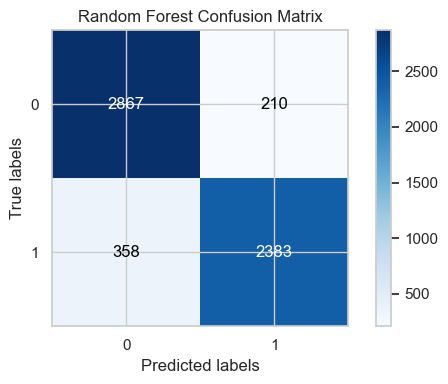

In [35]:

rf_predictions = rf_best.predict(X_test)

# Calculate confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Display confusion matrix using Matplotlib
plt.figure(figsize=(6, 4))
plt.imshow(rf_confusion_matrix, interpolation='nearest', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
tick_marks = range(len(rf_confusion_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
thresh = rf_confusion_matrix.max() / 2.
for i in range(rf_confusion_matrix.shape[0]):
    for j in range(rf_confusion_matrix.shape[1]):
        plt.text(j, i, format(rf_confusion_matrix[i, j], 'g'),
                 ha="center", va="center",
                 color="white" if rf_confusion_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

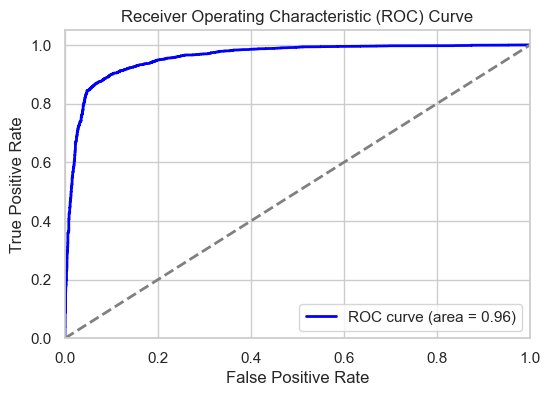

In [36]:


# Get probability scores
rf_probabilities = rf_best.predict_proba(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
